# JupyterWorkflow


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [55]:
from jupyterworkflow.data import get_fremont_data

In [56]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


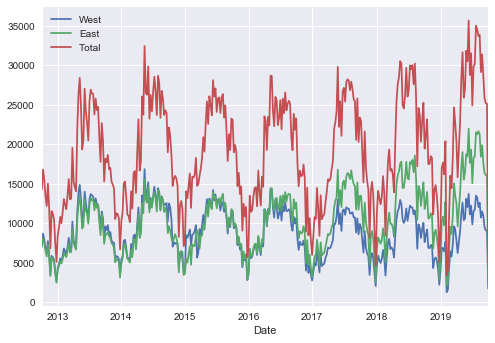

In [57]:
data.resample('W').sum().plot();

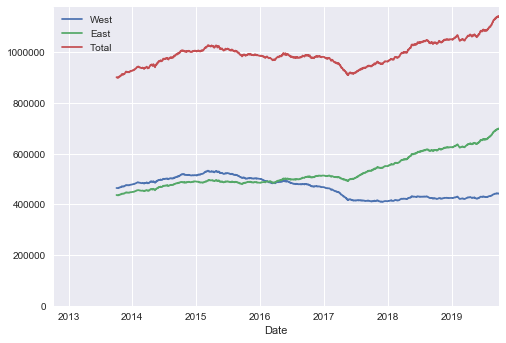

In [58]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

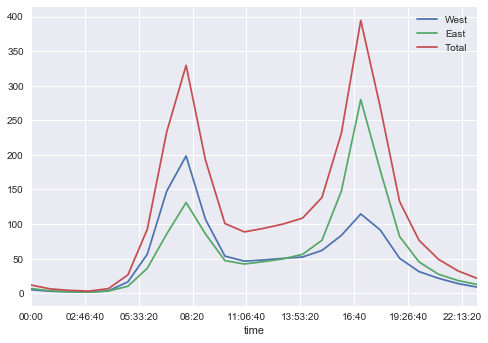

In [59]:
data.groupby(data.index.time).mean().plot();

In [60]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


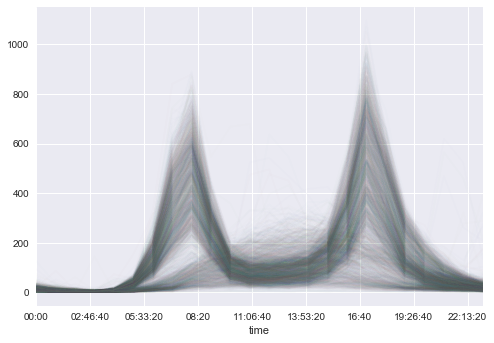

In [61]:
pivoted.plot(legend=False, alpha=0.01);